In [33]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [34]:
def CheckBase(points):
    points = np.array(points)
    dists = [np.linalg.norm(points[0]-points[1]),np.linalg.norm(points[0]-points[2]),np.linalg.norm(points[2]-points[1])]
    dists.sort()
    return (dists[0] + dists[1] > dists[2])

In [35]:
def CheckIntersectionTwosegment(s1,s2):
    k1 = (s1[0][1] - s1[1][1])/(s1[0][0] - s1[1][0])
    b1 = s1[0][1] - k1 * s1[0][0]
    k2 = (s2[0][1] - s2[1][1])/(s2[0][0] - s2[1][0])
    b2 = s2[0][1] - k2 * s2[0][0]
    if (s2[0][1] - s2[0][0] * k1 - b1)*(s2[1][1] - s2[1][0] * k1 - b1) <= 0 and (s1[0][1] - s1[0][0] * k2 - b2)*(s1[1][1] - s1[1][0] * k2 - b2) <= 0:
        return True
    return False

In [36]:
def CheckIntersection(s1,s2):
    a1 = s1[0][1] - s1[1][1]
    b1 = s1[1][0] - s1[0][0]
    c1 = -b1*s1[0][1] - a1*s1[0][0]
    a2 = s2[0][1] - s2[1][1]
    b2 = s2[1][0] - s2[0][0]
    c2 = -b2*s2[0][1] - a2*s2[0][0]
    if (s2[0][1]*b1 + s2[0][0] * a1 + c1)*(s2[1][1]*b1 + s2[1][0] * a1 + c1) <= 0 and (s1[0][1]*b2 + s1[0][0] * a2 + c2)*(s1[1][1]*b2 + s1[1][0] * a2 + c2) <= 0:
        return True
    return False

In [37]:
def CheckIfExist(point,figure):
    for p in figure:
        if p[0] == point[0] and p[1] == point[1]:
            return True
    return False

In [38]:
def GetBase(points, mode = 0):
    length = len(points)
    if mode == 0:
        i1,i2,i3 = np.random.randint(length,size = 3)
        while not CheckBase([points[i1],points[i2],points[i3]]):
            i1,i2,i3 = np.random.randint(length,size = 3)
        return [points[i2],points[i3],points[i1]]
    if mode == 1:
        i1,i2,i3 = np.random.randint(length,size = 3)
        while i1 == i2 or i2 == i3 or i1 == i3:
            i1,i2,i3 = np.random.randint(length,size = 3)
        return [points[i2],points[i3],points[i1]]
    if mode == 2:
        i1 = np.random.randint(length)
        arr = []
        for i in range(length):
            if i == i1:
                continue
            arr += [[points[i][0] * points[i][0] + points[i][1] * points[i][1],i]]
        arr.sort()
        return [points[i1],points[arr[0][1]],points[arr[1][1]]]
    if mode == 3:
        min_area = float("inf")
        res_base = []
        for p1 in points:
            for p2 in points:
                for p3 in points:
                    if p1 == p2 or p2 == p3 or p1 == p3:
                        continue
                    area = np.cross(np.array(p1)-np.array(p2),np.array(p1)-np.array(p3))
                    if area < min_area:
                        min_area = area
                        res_base = [p1,p2,p3]
        return res_base

In [39]:
def UpdateFigure(point,figure):
    size = len(figure)
    
    if CheckIfExist(point,figure):
        return figure
    
    while True:
        edgeind = np.random.randint(0,size)
        newedge1 = [figure[edgeind],point]
        newedge2 = [figure[(edgeind+1)%size],point]
        ok = True
        for i in range(0,size):
            if i == edgeind:
                continue
            currEdge = [figure[i],figure[(i+1)%size]]
            currAndFirst = CheckIntersection(currEdge,newedge1) 
            currAndSecond = CheckIntersection(currEdge,newedge2)
            if currAndFirst or currAndSecond:
                if i == (size + edgeind - 1)%size and not currAndSecond:
                    continue
                elif i == (edgeind + 1)%size and not currAndFirst:
                    continue
                ok = False
                break
            
        if ok:
            figure = np.insert(figure,(edgeind+1)%size,point,axis=0)
            return figure

In [40]:
def GenerateRandomPolygon(points):
    triangleBase = GetBase(points)
    figure = triangleBase
    for p in points:
        figure = UpdateFigure(p,figure)
    figure = np.append(figure,[figure[0]],axis = 0)
    return figure

In [41]:
def GetRandomPoint(feasible_points):
    return feasible_points[np.random.randint(len(feasible_points))]

In [42]:
def GetDistanceFromPointToPolygon(point, figure):
    distance = math.inf
    for pnt in figure:
        dist_to_figure_point = math.hypot(pnt[0] - point[0], pnt[1] - point[1])
        distance = min(distance,dist_to_figure_point)
    for i in range(1,len(figure)):
        edge_len = math.hypot(figure[i][0] - figure[i-1][0],figure[i][1] - figure[i-1][1])
        edge_vec = [figure[i][0] - figure[i-1][0],figure[i][1] - figure[i-1][1]]
        point_vec = [point[0] - figure[i-1][0],point[1] - figure[i-1][1]]
        point_vec_len = math.hypot(point_vec[0],point_vec[1])
        dot = (edge_vec[0] * point_vec[0] + edge_vec[1] * point_vec[1])/edge_len
        if dot > 0 and dot < edge_len:
            dist_to_figure_point = math.sqrt(point_vec_len * point_vec_len - dot*dot)
            distance = min(distance,dist_to_figure_point)
    return distance

In [43]:
def GetGreedyPoint(feasible_points,figure):
    point = []
    min_dist = math.inf
    for pnt in feasible_points:
        dist = GetDistanceFromPointToPolygon(pnt,figure)
        if dist < min_dist:
            min_dist = dist
            point = pnt
    return point

In [44]:
def GetFeasibleEdges(point,figure):
    feasible_edges = []
    size = len(figure)
    for i in range(size):
        new_edge1 = [figure[i],point]
        new_edge2 = [figure[(i+1)%size],point]
        ok = True
        for j in range(size):
            if j == i:
                continue
            curr_edge = [figure[j],figure[(j+1)%size]]
            currAndFirst = CheckIntersection(curr_edge,new_edge1)
            currAndSecond = CheckIntersection(curr_edge,new_edge2)
            if currAndFirst or currAndSecond:
                if j == (size + i - 1)%size and not currAndSecond:
                    continue
                elif j == (i + 1)%size and not currAndFirst:
                    continue
                ok = False
                break
        if ok:
            feasible_edges += [[i,(i+1)%size]]
    return feasible_edges

In [45]:
def GetGreedyEdge(point,feasible_edges,figure):
    min_area = math.inf
    res_edge = feasible_edges[0]
    for edge in feasible_edges:
        area = abs(np.cross([point[0] - figure[edge[0]][0],point[1] - figure[edge[0]][1]],[[point[0] - figure[edge[1]][0],point[1] - figure[edge[1]][1]]])/2)
        if area < min_area:
            min_area = area
            res_edge = edge
    return res_edge

In [169]:
def GreedyArea(feasible_points,figure):
    res_point = feasible_points[0]
    res_edge = [0,1]
    min_area = float("inf")
    for point in feasible_points:
        feasible_edges = GetFeasibleEdges(point,figure)
        for edge in feasible_edges:
            points = np.array([point,figure[edge[0]],figure[edge[1]]])
            area = abs(np.cross(points[0] - points[1],points[0] - points[2])/2)
            if area < min_area:
                min_area = area
                res_point = point
                res_edge = edge
    return res_point,res_edge

In [236]:
def Approach1(points):
    #RGT(Random Greedy Triangle)
    figure = np.array(GetBase(points,2))
    
    feasible_points = [pnt for pnt in points if pnt not in figure]
    
    while len(feasible_points) >0:
        #GP(Greedy Point)
        point = GetGreedyPoint(feasible_points,figure)
        feasible_points.remove(point)
        
        feasible_edges = GetFeasibleEdges(point,figure)
        if len(feasible_edges) ==0:
            continue
        #GE(Greedy Edge)
        edge = GetGreedyEdge(point,feasible_edges,figure)
        
        figure = np.insert(figure,(edge[0]+1)%len(figure),point,axis=0)
    return figure

In [237]:
def Approach2(points):
    #RGT(Random Greedy Triangle)
    figure = np.array(GetBase(points,2))
    
    feasible_points = [pnt for pnt in points if pnt not in figure]
    
    while len(feasible_points) >0:
        #RP(Random Point)
        point = GetRandomPoint(feasible_points)
        feasible_points.remove(point)
        
        feasible_edges = GetFeasibleEdges(point,figure)
        if len(feasible_edges) ==0:
            continue
        #GE(Greedy Edge)
        edge = GetGreedyEdge(point,feasible_edges,figure)
        
        figure = np.insert(figure,(edge[0]+1)%len(figure),point,axis=0)
    return figure

In [238]:
def Approach3(points):
    #RGT(Random Greedy Triangle)
    figure = np.array(GetBase(points,2))
    
    feasible_points = [pnt for pnt in points if pnt not in figure]
    
    while len(feasible_points) >0:
        #GAr(Greedy Area)
        point,edge = GreedyArea(feasible_points,figure)
        feasible_points.remove(point)
        
        figure = np.insert(figure,(edge[0]+1)%len(figure),point,axis=0)
    return figure

In [239]:
def Approach4(points):
    #RT(Random Triangle)
    figure = np.array(GetBase(points,0))
    
    feasible_points = [pnt for pnt in points if pnt not in figure]
    
    while len(feasible_points) >0:
        #GP(Greedy Point)
        point = GetGreedyPoint(feasible_points,figure)
        feasible_points.remove(point)
        
        feasible_edges = GetFeasibleEdges(point,figure)
        if len(feasible_edges) ==0:
            continue
        #GE(Greedy Edge)
        edge = GetGreedyEdge(point,feasible_edges,figure)
        
        figure = np.insert(figure,(edge[0]+1)%len(figure),point,axis=0)
    return figure

In [240]:
def Approach5(points):
    #RT(Random Triangle)
    figure = np.array(GetBase(points,0))
    
    feasible_points = [pnt for pnt in points if pnt not in figure]
    
    while len(feasible_points) >0:
        #RP(Random Point)
        point = GetRandomPoint(feasible_points)
        feasible_points.remove(point)
        
        feasible_edges = GetFeasibleEdges(point,figure)
        if len(feasible_edges) ==0:
            continue
        #GE(Greedy Edge)
        edge = GetGreedyEdge(point,feasible_edges,figure)
        
        figure = np.insert(figure,(edge[0]+1)%len(figure),point,axis=0)
    return figure

In [241]:
def Approach6(points):
    #RT(Random Triangle)
    figure = np.array(GetBase(points,0))
    
    feasible_points = [pnt for pnt in points if pnt not in figure]
    
    while len(feasible_points) >0:        
        #GAr(Greedy Area)
        point,edge = GreedyArea(feasible_points,figure)
        feasible_points.remove(point)
        
        figure = np.insert(figure,(edge[0]+1)%len(figure),point,axis=0)
    return figure

In [53]:
def GreedyMAP(points):
    #RT(Random Triangle)
    figure = np.array(GetBase(points,3))
    
    feasible_points = [pnt for pnt in points if pnt not in figure]
    
    while len(feasible_points) >0:        
        #GAr(Greedy Area)
        point,edge = GreedyArea(feasible_points,figure)
        feasible_points.remove(point)
        
        figure = np.insert(figure,(edge[0]+1)%len(figure),point,axis=0)
    return figure

In [54]:
def GenerateMinimumPolygon(points):
    figure = np.array(GetBase(points,2))
    feasible_points = [pnt for pnt in points if pnt not in figure]
    while len(feasible_points) > 0:
        
        #getting next point
        #point = GetGreedyFeasiblePoint(feasible_points,figure)
        #or
        point = GetGreedyPoint(feasible_points,figure)
        feasible_points.remove(point)
        
        #get feasible edges
        feasible_edges = GetFeasibleEdges(point,figure)
        if len(feasible_edges) == 0:
            continue
        edge = GetGreedyEdge(point,feasible_edges,figure)
        
        figure = np.insert(figure,(edge[0]+1)%len(figure),point,axis=0)
    return figure

In [55]:
def BuildConvex(points):
    first_point = sorted(points,key = lambda x: x[1])[0]
    points = sorted(points,key = lambda x: [math.atan2(x[1] - first_point[1],x[0] - first_point[0]),(x[1] - first_point[1])*(x[1] - first_point[1]) + (x[0] - first_point[0])*(x[0] - first_point[0])])
    fig = [first_point,points[1],points[2]]
    for i in range(3,len(points)):
        while len(fig) > 2:
            square = np.cross(np.array(fig[-2]) - np.array(fig[-1]),np.array(fig[-2]) - np.array(points[i]))
            if square > 0:
                break
            fig.pop()
        fig+=[points[i]]
    fig += [first_point]
    return fig        

In [164]:
def CreateRandomPoints(count):
    return np.random.randint(100,size = (count,2)).tolist()

In [57]:
def ShowPoints(points):
    for p in points:
        plt.plot(p[0],p[1],'bo')
    plt.plot(points[0][0],points[0][1],'r.')

In [58]:
def DrawPolygon(figure,fill = True):
    plt.plot(figure[:,0],figure[:,1],'g')
    plt.plot(figure[:,0],figure[:,1],'bo',markersize=3)
    if fill:
        plt.fill(figure[:,0],figure[:,1],'r')

In [59]:
def FindPolygonArea(points):
    area = 0
    size = len(points)
    for i in range(size):
        area += np.cross(points[i],points[(i+1)%size])/2
    return abs(area)

In [60]:
def FindPolygonAreaTrapezia(points):
    area = 0
    size = len(points)
    for i in range(size):
        area += (points[i][0] - points[(i+1)%size][0])*(points[i][1]+points[(i+1)%size][1])/2
    return abs(area)

In [254]:
points = CreateRandomPoints(100)

Progress:  0.0 %
3208.5
3208.5
Wall time: 3.94 s


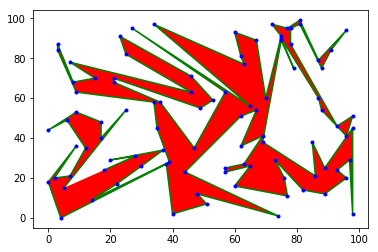

In [255]:
%%time
%matplotlib inline
import mpld3
mpld3.enable_notebook()
iterations = 1
min_polygon = []
min_area = math.inf
for i in range(iterations):
    figure = GenerateMinimumPolygon(points)
    area = FindPolygonArea(figure)
    if area < min_area:
        print("Progress: ",1.0*i/iterations * 100,"%")
        print(FindPolygonArea(figure))
        print(FindPolygonAreaTrapezia(figure))
        min_polygon = figure
        min_area = area
    if area == 0:
        break
DrawPolygon(min_polygon)

3970.5
3970.5


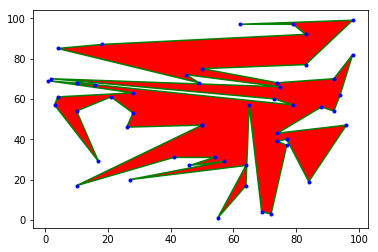

In [63]:
figure = GenerateRandomPolygon(points)
print(FindPolygonArea(figure))
print(FindPolygonAreaTrapezia(figure))
DrawPolygon(figure)

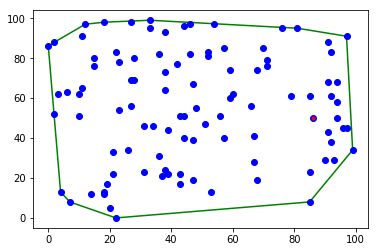

In [64]:
points = CreateRandomPoints(100)
fig = np.array(BuildConvex(points))
DrawPolygon(fig,False)
ShowPoints(points)

In [217]:
points = CreateRandomPoints(200)

4927.0
Wall time: 5min 59s


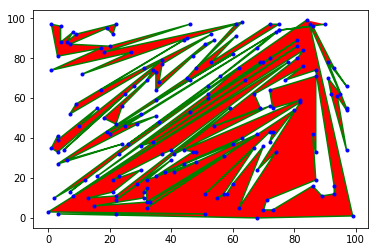

In [253]:
%%time
figure = GreedyMAP(points)
#figure = Approach1(points)
#figure = Approach2(points)
#figure = Approach3(points)
#figure = Approach4(points)
#figure = Approach5(points)
#figure = Approach6(points)
print(FindPolygonAreaTrapezia(figure))
DrawPolygon(figure)